In [14]:
install.packages("tripack") 


The downloaded binary packages are in
	/var/folders/59/phgwmyk563s3dw33m2t84qkw0000gn/T//RtmpgbrCH8/downloaded_packages


In [4]:
install.packages("rjson") 


  There is a binary version available but the source version is later:
      binary source needs_compilation
rjson 0.2.19 0.2.20              TRUE



installing the source package ‘rjson’



In [15]:
library(rjson)
library(igraph)
library(data.table)
library(tripack)


Attaching package: ‘tripack’

The following objects are masked from ‘package:igraph’:

    convex.hull, triangles



In [16]:
data(tritest)
tritest.tr<-tri.mesh(tritest$x,tritest$y)
tritest.tr

triangulation nodes with neigbours:
node: (x,y): neighbours
1: (0,0) [5]: 2 3 4 7 9 
2: (1,0) [5]: 1 3 5 8 10 
3: (0.5,0.15) [4]: 1 2 9 10 
4: (0.15,0.5) [4]: 1 7 9 12 
5: (0.85,0.5) [4]: 2 8 10 11 
6: (0.5,0.85) [4]: 7 8 11 12 
7: (0,1) [5]: 1 4 6 8 12 
8: (1,1) [5]: 2 5 6 7 11 
9: (0.35,0.35) [6]: 1 3 4 10 11 12 
10: (0.65,0.35) [5]: 2 3 5 9 11 
11: (0.65,0.65) [6]: 5 6 8 9 10 12 
12: (0.35,0.65) [5]: 4 6 7 9 11 
number of nodes: 12 
number of arcs: 29 
number of boundary nodes: 4 
boundary nodes:  1 2 7 8 
number of triangles: 18 
number of constraints: 0 

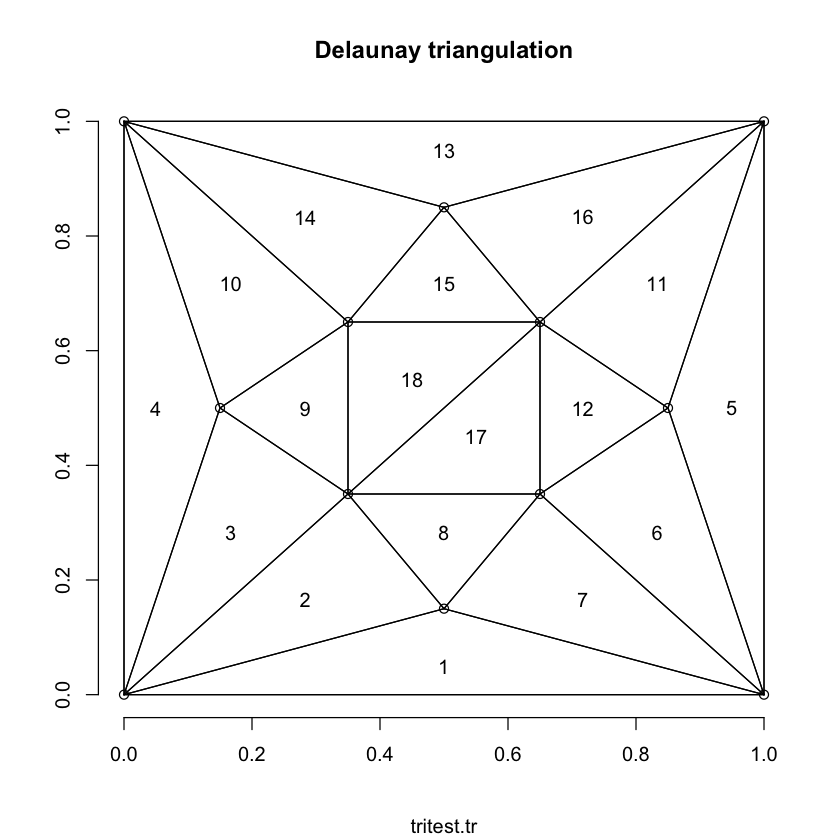

In [28]:
plot(tritest.tr)
axis(1)
axis(2)

In [34]:
json_data <- fromJSON(paste(readLines("san_francisco_censustracts.json"), collapse=""))
ver_attr <- data.frame(matrix(ncol = 4, nrow = 0))
x <- c("id", "name", "x_coor", "y_coor")
colnames(ver_attr) <- x
length(json_data$features)
for (i in (1:length(json_data$features))){
    coor_len <- length(json_data$features[[i]]$geometry$coordinates[[1]][[1]])
    latitude <- 0
    longitude <- 0
    for (j in (1:coor_len)){
        latitude <- latitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][1]
        longitude <- longitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][2]
    }
    x <- latitude / coor_len
    y <- longitude / coor_len
    id <- json_data$features[[i]]$properties$MOVEMENT_ID
    name <- json_data$features[[i]]$properties$DISPLAY_NAME
    ver_attr[nrow(ver_attr) + 1,] = list(id, name, x, y)
}
nrow(ver_attr)
head(ver_attr)
print(ver_attr[1,]$y_coor)

Warning message in readLines("san_francisco_censustracts.json"):
“incomplete final line found on 'san_francisco_censustracts.json'”

[1] 2710

[1] 2710

id,name,x_coor,y_coor
1,"Sargent Creek, San Ardo",-120.7887,36.07163
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665


NULL


In [36]:
print(ver_attr$y_coor)


   [1] 36.07163 37.46958 37.15048 38.57307 38.55443 38.36665 38.32585 38.26188
   [9] 37.78570 37.69418 37.76419 38.58128 38.75507 36.70546 36.47324 36.61764
  [17] 36.58817 38.78860 38.69774 37.78791 37.80246 35.47923 38.25290 38.24969
  [25] 38.34321 38.30574 38.46703 38.55274 36.13002 37.76635 37.90118 38.13972
  [33] 38.13598 38.10816 37.79921 37.79910 37.34551 37.20584 38.10528 38.26397
  [41] 37.97744 37.73222 37.96146 37.72475 37.89205 37.80742 37.74645 38.58038
  [49] 38.62417 38.69101 38.70597 37.36807 37.29870 39.76916 37.94561 37.96161
  [57] 37.95848 37.84326 37.57010 37.57195 37.56170 37.54504 37.53915 37.53730
  [65] 37.51988 37.48634 38.50200 37.31417 36.60125 38.73638 38.77852 38.82613
  [73] 38.29283 37.31600 38.28086 38.23947 37.29442 37.72774 37.79089 37.78143
  [81] 37.74062 37.75195 38.61094 38.03554 38.03603 37.41010 37.41760 37.00267
  [89] 36.98417 37.65097 37.51077 38.57169 38.54005 38.55311 38.93718 37.86604
  [97] 37.90049 37.80170 37.79420 37.98226 37.95460 

In [9]:
print(ver_attr[1,]$coor[[1]][2])

[1] 36.07163


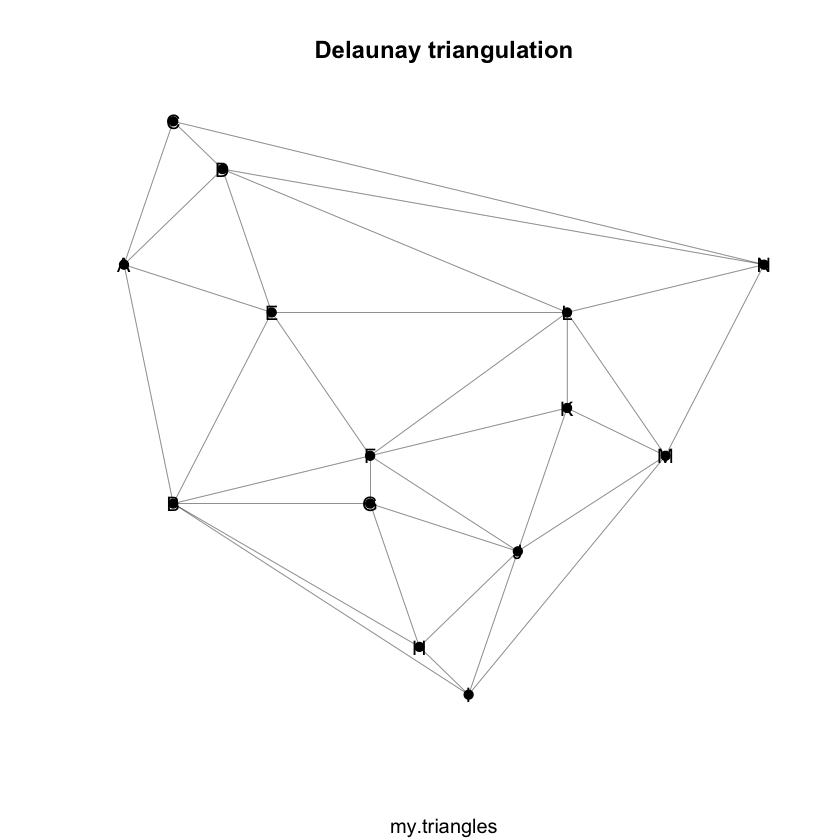

In [30]:
id <- c("A","B","C","D","E","F","G","H","I","J","K","L","M","N")
x_coor <- c(0.5,1,1,1.5,2,3,3,3.5,4,4.5,5,5,6,7)
y_coor <- c(5.5,3,7,6.5,5,3.5,3,1.5,1,2.5,4,5,3.5,5.5)
my.data <- data.frame(id = id, x_coor = x_coor, y_coor = y_coor)

# When I perform Delaunay triangulation, I can see the distances....
library(tripack)
my.triangles<-tri.mesh(my.data$x_coor, my.data$y_coor)
plot(my.triangles, do.points=FALSE, lwd=0.2)
points(my.data$x, my.data$y, col = "black", pch=20, cex = 1.5)
text(my.data$x, my.data$y, labels = my.data$id)

In [37]:
ver_attr.triangles<-tri.mesh(ver_attr$x_coor, ver_attr$y_coor)

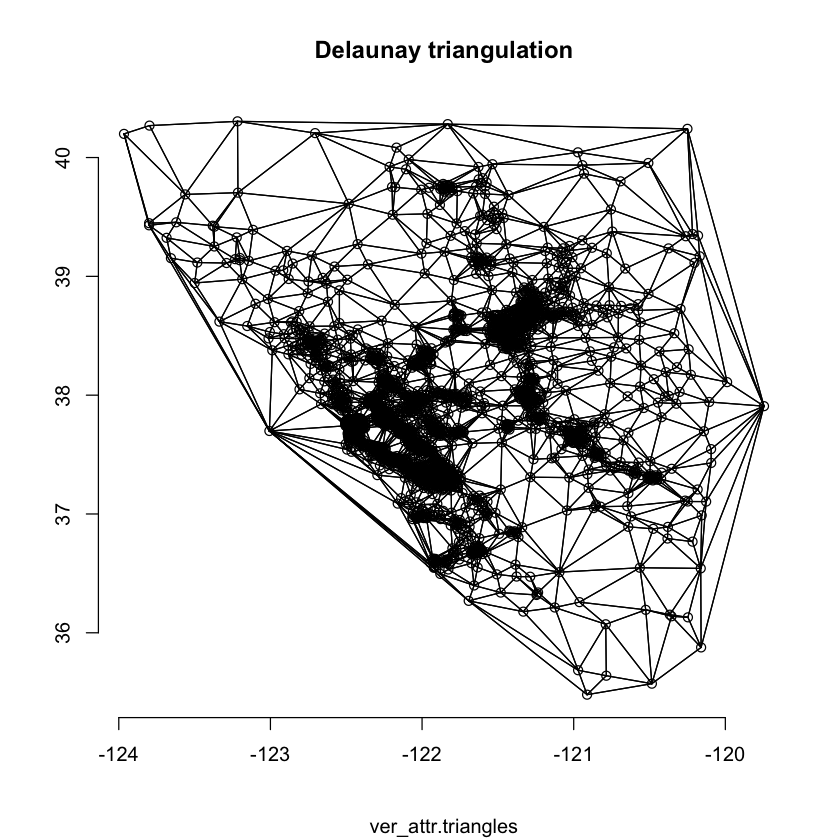

In [39]:
plot(ver_attr.triangles)
axis(1)
axis(2)



## Q12